# Master TIDE - Conférences Python 2021

### Natural Language Processing

Francis Wolinski

&copy; 2021 Yotta Conseil

In [2]:
# imports
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#no warning
import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_colwidth', 100)

## 1. Rappel sur les chaînes de caractères

En Python, les chaînes de caractères sont des instances de la classe `str`. Ce sont des collections ordonnées immuables de caractères.

In [2]:
# exemple
s = 'Un exemple de chaîne de caractères'
type(s)

str

Une chaîne de caractères doit être vue comme une collection d'octets (bytes) qui représente la chaîne en machine et d'un encodage qui exprime la manière dont les caractères sont codés.

La méthode `encode()` permet d'encoder une chaîne en octets selon un encodage particulier, par défaut en `UTF-8`. On obtient un objet de type `bytes`.

Python gère tout un ensemble d'encodages: `utf-8` (par défaut en Python 3), `ascii`, `latin-1` ou `ISO-8859-1`, `ISO-8859-15`, `cp1252`, etc.

In [3]:
# encodage en UTF-8
s.encode()

b'Un exemple de cha\xc3\xaene de caract\xc3\xa8res'

In [4]:
# encodage en latin-1 ou ISO-8859-1
s.encode('latin-1')

b'Un exemple de cha\xeene de caract\xe8res'

In [5]:
# decodage bytes --> str
b'Un exemple de cha\xeene de caract\xe8res'.decode('latin-1')

'Un exemple de chaîne de caractères'

In [6]:
# exemple d'écriture de fichier en UTF-8
with open('texte.txt', 'w', encoding='utf-8') as f:
    f.write(s + '\n' + s)

In [7]:
# exemple de lecture de fichier en UTF-8
with open('texte.txt', encoding='utf-8') as f:
    texte = f.read()
texte

'Un exemple de chaîne de caractères\nUn exemple de chaîne de caractères'

In [8]:
# exemple de lecture de fichier en latin-1
with open('texte.txt', encoding='latin-1') as f:
    texte = f.read()
texte

'Un exemple de chaÃ®ne de caractÃ¨res\nUn exemple de chaÃ®ne de caractÃ¨res'

## 2. Traitement vectoriel avec `pandas`

La librairie `pandas` permet d'effectuer un traitement vectoriel des textes en utilisant l'accesseur `str`.

Il existe de nombreuses méthodes de la classe `str` reprises dans `pandas`. Par exemple :
- `startswith()` : teste si une chaîne commence par une sous-chaîne
- `endswith()` : teste si une chaîne se termine par une sous-chaîne
- `contains()` : teste si une chaîne contient un motif (regex)
- `extract()` : extrait un ou plusieurs motifs (regex)

In [3]:
# chargement d'un fichier texte dans une Series
df = pd.read_csv('imdb_master.csv', usecols=['review'], encoding='latin-1')
reviews = df['review']
reviews.head()

0    Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the ter...
1    This is an example of why the majority of action films are the same. Generic and boring, there's...
2    First of all I hate those moronic rappers, who could'nt act if they had a gun pressed against th...
3    Not even the Beatles could write songs everyone liked, and although Walter Hill is no mop-top he...
4    Brass pictures (movies is not a fitting word for them) really are somewhat brassy. Their allurin...
Name: review, dtype: object

In [10]:
df.shape

(100000, 1)

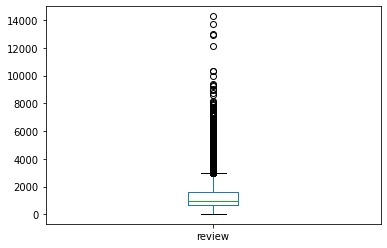

In [11]:
df["review"].str.len().plot.box();

In [12]:
df.loc[df["review"].str.len().idxmin()]

review    Read the book, forget the movie!
Name: 8999, dtype: object

In [14]:
# sélection
reviews.loc[reviews.str.startswith('Very ')]

1209     Very odd, this seems like a very average movie to me, if not slightly less. It is brilliantly sh...
3171     Very dull show. Whats worse, its very racist. The white guys are dumb idiots and the only romanc...
3229     Very slow, dull, enigmatic film. MAybe the kind of film Jean-Luc Godard would have made had he b...
3269     Very resistible but ultimately harmless film version of the children's literary classic which in...
4060     Very curious that Nichols and Hanks would team up for this, obviously they believe it. Strange b...
                                                        ...                                                 
97802    Very intriguing, kept me on the edge of my seat, the plot was different, it is worth watching. A...
97819    Very touching warm film about two elderly men supporting each other both mentally and physically...
98017    Very disappointing! I saw this documentary at a screening event and I actually walked out of the...
99595    Very enjoy

In [15]:
# sélection
reviews.loc[reviews.str.contains('Hitchcock')]

173      oh well... its funny. should have been a sadistic comedy, a lot of horror movies lack common sen...
327      The film's executive producer is none other than that messenger of peace thru transcendental med...
817      I think this movie lacks so much of substance, it is even not worth a discussion.<br /><br />In ...
874      All through his career Hitchcock did great films; this was not one of them.<br /><br />A man kno...
875      I'll have to admit that I'm at a disadvantage here; when I learn more about a film from other re...
                                                        ...                                                 
99692    I'm stunned. I just finished watching this movie, and can't believe 1) how incredible it was; 2)...
99791    "Loose Change" is a thought-provoking little documentary that draws attention to and questions t...
99861    I thoroughly enjoyed this movie the first time I saw it ten years ago. The film reminded me of s...
99883    LIGHTHOUSE

In [16]:
# sélection
reviews.loc[reviews.str.contains('Hitchcock', flags=re.I)]

173      oh well... its funny. should have been a sadistic comedy, a lot of horror movies lack common sen...
327      The film's executive producer is none other than that messenger of peace thru transcendental med...
817      I think this movie lacks so much of substance, it is even not worth a discussion.<br /><br />In ...
874      All through his career Hitchcock did great films; this was not one of them.<br /><br />A man kno...
875      I'll have to admit that I'm at a disadvantage here; when I learn more about a film from other re...
                                                        ...                                                 
99692    I'm stunned. I just finished watching this movie, and can't believe 1) how incredible it was; 2)...
99791    "Loose Change" is a thought-provoking little documentary that draws attention to and questions t...
99861    I thoroughly enjoyed this movie the first time I saw it ten years ago. The film reminded me of s...
99883    LIGHTHOUSE

In [17]:
# extract
tab = reviews.str.extract(r'(\w+) Hitchcock', expand=False)
var = tab.dropna()
var

173        expect
327        Alfred
817            of
874        career
875        Alfred
           ...   
99617          as
99692           a
99861    favorite
99883          of
99891     exactly
Name: review, Length: 788, dtype: object

In [19]:
# mots précèdent Hitchcock
var.value_counts().head(20)

Alfred     215
of          86
a           37
to          28
the         25
from        18
by          18
like        15
in          14
and         14
as          14
with        11
that         9
on           6
for          5
Michael      5
some         5
no           4
best         4
or           4
Name: review, dtype: int64

In [20]:
# alignement de textes
def search(word):
    selection = reviews[reviews.str.contains(word)]
    result = selection.apply(lambda s: (' '*25 + s + ' '*25)[s.find(word):s.find(word) + 50 + len(word)])    
    return result

In [22]:
search('Scream')

170      uble feature DVD called "Scream Theater" and it's no dou
1171     e thing: his blood. "The Screaming" was shot very cheapl
1181      must have at least seen Scream (where they draw your at
1262     m. Taking the Tagline of Scream 2 too far.<br /><br />SP
1296     py hollywood movies like Scream and I Know What You Did 
                                   ...                           
96483    e have choice other than Scream, the Blair Witch Project
98886    remise (remind anyone of Scream 2?), doesn't try to pret
99024    One of these flicks was "Screamtime." As stated, this fi
99826    uel will sit <br /><br />Screamers the Hunt is out soon 
99901    y're now too restrained. Scream made it okay to be cleve
Name: review, Length: 412, dtype: object

In [23]:
search('Ã')

2        her and acting like clichÃ©'e version of gangsters.
12       rs an astonishingly clichÃ©d sentimental sexual fan
24       killer stalking the clichÃ© teenagers in the woods.
27        and where a rip-off of BÃ©la BartÃ³k's "Music for 
74       uel for me), namely the dÃ©cor of the rebellious go
                                ...                         
99875    uld chalk it up to naivetÃ©. Unfortunately, it got 
99886    a, his Uncle Mike's fiancÃ©e, being Jewish as well 
99903     fairly high. Every clichÃ© you can name features h
99918    t to the new cinema-veritÃ© look (a chase through t
99938    g a hero, especially a naÃ¯ve goody-two-shoes one, 
Name: review, Length: 6270, dtype: object

In [24]:
search('br')

1        t somewhat gratifying...<br /><br />Overall, this is
2        'e version of gangsters.<br /><br />The movie doesn'
4        hem) really are somewhat brassy. Their alluring visu
6        he weirdest I have seen.<br /><br />I was not aware 
7        a good thing in my book.<br /><br />Fans of "Beat" T
                                 ...                         
99990    Will anyone really care?<br /><br />The answer to th
99991    ...except not very good.<br /><br />The use of time 
99993     big-budget aspirations.<br /><br />The plot itself 
99995     at a very early effort.<br /><br />Most filmmakers 
99997    vie", now we are warn...<br /><br />But they are wro
Name: review, Length: 69974, dtype: object

In [25]:
# cleaning

# replace character encoding mistakes
reviews = reviews.apply(lambda x: x.replace('Ã¡', 'á'))
reviews = reviews.apply(lambda x: x.replace('Ã ', 'à'))
reviews = reviews.apply(lambda x: x.replace('Ã ', 'à'))
reviews = reviews.apply(lambda x: x.replace('Ã¢', 'â'))
reviews = reviews.apply(lambda x: x.replace('Ã\xa0', 'à'))
reviews = reviews.apply(lambda x: x.replace('Ã¥', 'å'))
reviews = reviews.apply(lambda x: x.replace('Ã£', 'ã'))
reviews = reviews.apply(lambda x: x.replace('Ã»', 'â'))
reviews = reviews.apply(lambda x: x.replace('Ã§', 'ç'))
reviews = reviews.apply(lambda x: x.replace('Ã©', 'é'))
reviews = reviews.apply(lambda x: x.replace('Ã¨', 'è'))
reviews = reviews.apply(lambda x: x.replace('Ã«', 'ë'))
reviews = reviews.apply(lambda x: x.replace('Ãª', 'ê'))
reviews = reviews.apply(lambda x: x.replace('Ã¯', 'ï'))
reviews = reviews.apply(lambda x: x.replace('Ã®', 'î'))
reviews = reviews.apply(lambda x: x.replace('Ã¬', 'ì'))
reviews = reviews.apply(lambda x: x.replace('Ã\xad', 'í'))
reviews = reviews.apply(lambda x: x.replace('Ã±', 'ñ'))
reviews = reviews.apply(lambda x: x.replace('Ã³', 'ó'))
reviews = reviews.apply(lambda x: x.replace('Ã²', 'ò'))
reviews = reviews.apply(lambda x: x.replace('Ã¶', 'ö'))
reviews = reviews.apply(lambda x: x.replace('Ã´', 'ô'))
reviews = reviews.apply(lambda x: x.replace('Ãµ', 'õ'))
reviews = reviews.apply(lambda x: x.replace('Ã°', 'ð'))
reviews = reviews.apply(lambda x: x.replace('Ã¸', 'ø'))
reviews = reviews.apply(lambda x: x.replace('Ãº', 'ú'))
reviews = reviews.apply(lambda x: x.replace('Ã¹', 'ù'))
reviews = reviews.apply(lambda x: x.replace('Ã¼', 'ü'))
reviews = reviews.apply(lambda x: x.replace('Ã½', 'ý'))
reviews = reviews.apply(lambda x: x.replace('Ã¿', 'ÿ'))
reviews = reviews.apply(lambda x: x.replace('Ã?', 'Æ'))
reviews = reviews.apply(lambda x: x.replace('Ã¦', 'æ'))
# br
reviews = reviews.apply(lambda x: x.replace('<br />', ' '))

In [26]:
search('Ã')

1486      that actors as dietmar bÃ¤r or charly hübner waste
3327     they watched some KaurismÃ¤ki, too, to find out wha
3328     go for any of the KaurismÃ¤ki brothers' movie, who 
8127     d on May 7, 1824 in the KÃ¤rntnertortheater in Vien
11518    , Mies vailla menneisyyttÃ¤ (2002)                 
                                ...                         
89797    loying a bunch of kindergÃ¤rtners to do their scree
93462    Fares' movies and Vuxna MÃ¤nniskor) that I saw from
94067    ionery" (in Romanian: "stÃ¤tÃ¤tor", as he said). "I
94708          I've just "Der EisbÃ¤r" and do not quite unde
94713     a second or a third EisbÃ¤r Movie...              
Name: review, Length: 93, dtype: object

In [27]:
# regex
import re

In [29]:
big_review = reviews.loc[reviews.str.len().idxmax()]
big_review

'***SPOILERS*** ***SPOILERS*** The first Godzilla movie in the third movie series, whereas GODZILLA VS. DESTOROYAH, the previous entry, aptly ended the second series. What else can I say? Well, let\'s break it down.  I once liked the 2nd series of Godzilla movies (1984-1995), even though I found something annoying about those movies (as either the bad or good guy, Godzilla was so sympathetic that the human characters came off as obnoxious). Then, in 1995, along came a movie called GAMERA: GUARDIAN OF THE UNIVERSE and its two successful sequels, all directed by master filmmaker Shuusuke Kaneko, who singlehandedly changed the face of Japanese monster movies forever. I was spoiled!!! The Series 2 Godzilla movies were suddenly looked down as half-hearted, heavy-handed, auto-piloted and lazy attempts at recreating the "original" Godzilla, and end up being an insult to the memory of genre masters Ishirou Honda and Eiji Tsuburaya. GAMERA 3: THE AWAKENING OF IRIS, released the same year as thi

In [29]:
big_review = reviews.loc[reviews.str.len().idxmax()]
big_review

'***SPOILERS*** ***SPOILERS*** The first Godzilla movie in the third movie series, whereas GODZILLA VS. DESTOROYAH, the previous entry, aptly ended the second series. What else can I say? Well, let\'s break it down.  I once liked the 2nd series of Godzilla movies (1984-1995), even though I found something annoying about those movies (as either the bad or good guy, Godzilla was so sympathetic that the human characters came off as obnoxious). Then, in 1995, along came a movie called GAMERA: GUARDIAN OF THE UNIVERSE and its two successful sequels, all directed by master filmmaker Shuusuke Kaneko, who singlehandedly changed the face of Japanese monster movies forever. I was spoiled!!! The Series 2 Godzilla movies were suddenly looked down as half-hearted, heavy-handed, auto-piloted and lazy attempts at recreating the "original" Godzilla, and end up being an insult to the memory of genre masters Ishirou Honda and Eiji Tsuburaya. GAMERA 3: THE AWAKENING OF IRIS, released the same year as thi

In [38]:
re.findall("[A-Za-z0-9À-ÿ]+", big_review)

['SPOILERS',
 'SPOILERS',
 'The',
 'first',
 'Godzilla',
 'movie',
 'in',
 'the',
 'third',
 'movie',
 'series',
 'whereas',
 'GODZILLA',
 'VS',
 'DESTOROYAH',
 'the',
 'previous',
 'entry',
 'aptly',
 'ended',
 'the',
 'second',
 'series',
 'What',
 'else',
 'can',
 'I',
 'say',
 'Well',
 'let',
 's',
 'break',
 'it',
 'down',
 'I',
 'once',
 'liked',
 'the',
 '2nd',
 'series',
 'of',
 'Godzilla',
 'movies',
 '1984',
 '1995',
 'even',
 'though',
 'I',
 'found',
 'something',
 'annoying',
 'about',
 'those',
 'movies',
 'as',
 'either',
 'the',
 'bad',
 'or',
 'good',
 'guy',
 'Godzilla',
 'was',
 'so',
 'sympathetic',
 'that',
 'the',
 'human',
 'characters',
 'came',
 'off',
 'as',
 'obnoxious',
 'Then',
 'in',
 '1995',
 'along',
 'came',
 'a',
 'movie',
 'called',
 'GAMERA',
 'GUARDIAN',
 'OF',
 'THE',
 'UNIVERSE',
 'and',
 'its',
 'two',
 'successful',
 'sequels',
 'all',
 'directed',
 'by',
 'master',
 'filmmaker',
 'Shuusuke',
 'Kaneko',
 'who',
 'singlehandedly',
 'changed',
 't

In [37]:
re.findall("[0-9]+", big_review)

['2',
 '1984',
 '1995',
 '1995',
 '2',
 '3',
 '1998',
 '70',
 '3',
 '2000',
 '4',
 '8',
 '1975',
 '2000',
 '1989',
 '3',
 '90',
 '1999',
 '1984',
 '1989',
 '1995',
 '3',
 '1975',
 '1984',
 '1992',
 '1995',
 '1',
 '1',
 '1998',
 '50',
 '75',
 '1954',
 '1',
 '1',
 '1',
 '2000']

In [42]:
reviews.str.extract("(\w+) movie (\w+)").dropna()

,0,1
0,a,for
2,The,doesn
3,turned,star
6,strange,that
7,this,is
...,...,...
99986,The,then
99988,the,takes
99989,the,is
99997,a,like


## 3. Modèle du sac de mots (bag-of-words)

Le modèle du sac de mots est un modèle dans lequel un texte est représenté par un dictionnaire (non ordonné) fréquentiel des mots : nombre d'occurences du mot dans un texte, nombre de documents contenant ce mot pour un corpus.

Il est possible au préalable de défléchir les mots, c'est-à-dire de les remplacer par une forme simplifiée : passage en minuscules, lemmatisation (masculin, singulier, infinitif), racinisation (noyau lexical).

In [43]:
# import
from collections import Counter

In [44]:
'A bon chat bon rat'.split()

['A', 'bon', 'chat', 'bon', 'rat']

In [45]:
# exemple
c = Counter()
c.update('A bon chat bon rat'.split())
c

Counter({'A': 1, 'bon': 2, 'chat': 1, 'rat': 1})

In [46]:
# texte
reviews[0]

"Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in."

In [47]:
# calcul du Counter
pattern = r'[A-Za-zÀ-ÿ0-9]+'
c = Counter()
c.update(re.findall(pattern, reviews[0]))
c

Counter({'Once': 1,
         'again': 1,
         'Mr': 1,
         'Costner': 4,
         'has': 1,
         'dragged': 1,
         'out': 1,
         'a': 3,
         'movie': 1,
         'for': 1,
         'far': 1,
         'longer': 1,
         'than': 2,
         'necessary': 1,
         'Aside': 1,
         'from': 2,
         'the': 5,
         'terrific': 1,
         'sea': 1,
         'rescue': 1,
         'sequences': 1,
         'of': 5,
         'which': 2,
         'there': 1,
         'are': 4,
         'very': 2,
         'few': 1,
         'I': 3,
         'just': 1,
         'did': 2,
         'not': 2,
         'care': 3,
         'about': 3,
         'any': 1,
         'characters': 1,
         'Most': 1,
         'us': 2,
         'have': 1,
         'ghosts': 2,
         'in': 2,
         'closet': 2,
         'and': 3,
         's': 3,
         'character': 2,
         'realized': 1,
         'early': 1,
         'on': 1,
         'then': 1,
         'forgotten':

In [48]:
# mise en Series
s = pd.Series(c)
s = s.sort_values(ascending=False)
s

of           5
the          5
Costner      4
are          4
is           3
            ..
much         1
until        1
forgotten    1
then         1
hour         1
Length: 120, dtype: int64

In [49]:
# tous les textes
pattern = r'[A-Za-zÀ-ÿ0-9]+'
c = Counter()
reviews.apply(lambda x: c.update(re.findall(pattern, x)))
vocab = pd.Series(c)
vocab = vocab.sort_values(ascending=False)
vocab

the              1159007
and               626061
a                 624643
of                576405
to                533019
                  ...   
Hussien                1
Commancheroes          1
Rustlers               1
Shahan                 1
razzing                1
Length: 184375, dtype: int64

In [50]:
# dictionaire fréquentiel
# tous les textes
pattern = r'[A-Za-zÀ-ÿ0-9]+'
c = Counter()
reviews.apply(lambda x: c.update(set(re.findall(pattern, x))))
vocab = pd.Series(c)
vocab = vocab.sort_values(ascending=False)
vocab

the          98723
a            96189
and          96097
of           94909
to           93824
             ...  
unvented         1
Learoyd          1
Slickness        1
Perovitch        1
razzing          1
Length: 184375, dtype: int64

In [5]:
# stop words
from nltk.corpus import stopwords
stopwords_en = stopwords.words("english")

stopwords_en

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
# élisions en anglais
[w for w in stopwords_en if "'" in w]

["you're",
 "you've",
 "you'll",
 "you'd",
 "she's",
 "it's",
 "that'll",
 "don't",
 "should've",
 "aren't",
 "couldn't",
 "didn't",
 "doesn't",
 "hadn't",
 "hasn't",
 "haven't",
 "isn't",
 "mightn't",
 "mustn't",
 "needn't",
 "shan't",
 "shouldn't",
 "wasn't",
 "weren't",
 "won't",
 "wouldn't"]

In [53]:
# dictionaire fréquentiel
# tous les textes
# mots en minuscules
# sans stop words
pattern = r'[A-Za-zÀ-ÿ0-9]+(?:\'(?:d|ll|re|s|t|ve))?'
c = Counter()
reviews.apply(lambda x: c.update(set(re.findall(pattern, x.lower()))))
vocab = pd.Series(c)
vocab = vocab.drop(stopwords_en, errors='ignore')
vocab = vocab.sort_values(ascending=False)
vocab

movie      61011
one        56764
film       55257
like       46561
good       37998
           ...  
qaulen         1
alienâ         1
quaien         1
dimbulb        1
razzing        1
Length: 158814, dtype: int64

## 4. Calcul de bi-grammes

Recherche de cooccurrence de mots.

In [67]:
import nltk
from nltk import word_tokenize

from tqdm import tqdm

def get_doc():
    for text in tqdm(reviews[:10_000]):
        words = word_tokenize(text.lower())
        doc = [word for word in words if word.isalpha() and not word in stopwords_en]
        yield doc

bgm = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents(get_doc())
finder.apply_freq_filter(3)
scored = finder.score_ngrams(bgm.likelihood_ratio)

# save to pickle
import pickle
with open('scored.pkl', 'wb') as f:
    pickle.dump(scored, f)

100%|███████████████████████████████████| 10000/10000 [00:28<00:00, 352.36it/s]


In [66]:
','.isalpha()

False

In [68]:
scored

[(('special', 'effects'), 7399.650397993141),
 (('ever', 'seen'), 5975.185031974528),
 (('waste', 'time'), 4625.857295656097),
 (('low', 'budget'), 4471.6139617088065),
 (('looks', 'like'), 3242.9160305344794),
 (('high', 'school'), 2637.880234550541),
 (('years', 'ago'), 2294.221340387722),
 (('much', 'better'), 2290.987299592617),
 (('gon', 'na'), 2207.396013684298),
 (('main', 'character'), 2136.130037309281),
 (('year', 'old'), 2069.2581495752747),
 (('look', 'like'), 2004.8603860032704),
 (('even', 'though'), 1958.6687238731313),
 (('production', 'values'), 1933.540336442419),
 (('new', 'york'), 1927.7648055337806),
 (('one', 'worst'), 1648.5427599720213),
 (('ed', 'wood'), 1625.30715835149),
 (('martial', 'arts'), 1591.567001191247),
 (('character', 'development'), 1576.3995211242675),
 (('want', 'see'), 1426.8726885427775),
 (('stay', 'away'), 1424.5614153548238),
 (('pretty', 'much'), 1386.4211882831523),
 (('whole', 'thing'), 1298.0325768217915),
 (('read', 'book'), 1275.52947

In [ ]:
# load from pickle
import pickle
with open('scored.pkl', 'rb') as f:
    scored = pickle.load(f)

In [ ]:
# bi-grammes trouvés
scored

In [56]:
# nb de bi-grammes
len(scored)

72697

In [57]:
def search(word1=None, word2=None, n=10):
    i = 0
    for (w1, w2), s in scored:
        if (word1 is None or (w1.find(word1)!=-1)) \
            and (word2 is None or (w2.find(word2)!=-1)):
            print(w1, w2, s)
            i += 1
            if i == n:
                 break

In [58]:
search('john')

john goodman 452.1966069305043
johnny depp 351.29948444121675
john wayne 331.8427126724786
johnson county 300.33907429309363
john travolta 280.65203721732803
john rhys-davies 233.34942504191974
john malkovich 211.28806002810705
johnathon schaech 178.21395030296267
john waters 167.73483354268365
john cusack 129.82297750080573


In [69]:
search('funny')

funny moments 265.2695200216491
funny parts 128.14575365353244
funny enough 67.71772459512297
funny bits 57.250243372811106
unfunny jokes 49.98971368358514
funny entertaining 47.08727528172048
funny thing 43.410025837084426
funny lines 43.40889381541119
funny jokes 41.78178089290739
funny stuff 35.39450784362176


In [63]:
search(word2='smith')

alan smithee 162.5698781862651
wilbur smith 113.88793589215531
pinkett smith 89.45590700184366
jerry goldsmith 88.14776124284808
kevin smith 77.99511238209416
mrs smith 69.8453414722879
amber smith 68.58956858243319
mrs. smith 56.60299175394711
thorne smith 52.366487403221456
jaclyn smith 48.54770465663168


## 5. Vector space model avec scikit-learn TF-IDF

En recherche d'information, `TF–IDF`, abréviation de **term frequency–inverse document frequency**, est un indicateur statistique qui cherche à capturer l'importance d'un terme dans un document au sein d'un corpus.

Un corpus contient `N` documents. Un terme apparaît dans `n` documents du corpus. pour un document donné de longueur `L`, un terme apparaît `T` fois.

`TF–IDF` est le produit de 2 facteurs :
- *term frequency* (dans un document donné) :
    - $\frac{T}{L}$
- *inverse document frequency* (fréquence d'apparition dans le corpus):
    - $\log(\frac{N}{n})$
    
Dans ce modèle, chaque document est représenté par un vecteur normalisé composé du calcul `TF–IDF` pour chaque terme qu'il contient (vector space model).

La librairie `scikit-learn` permet de calculer les vecteurs `TF–IDF` pour un corpus de documents.

Cette librairie comprend différentes classes traitant des textes:

- `CountVectorizer`: implémente la tokenisation et le décompte des occurrences
- `TfidfTransformer`: transforme une matrice de comptage en une représentation `TF` ou `TF–IDF`
- `TfidfVectorizer`: équivalent à *CountVectorizer* suivi par *TfidfTransformer*

Ces classes produisent des **matrices creuses**, c'est-à-dire des matrices pleines de 0 à 99% ou 99.9%, puisque chaque document ne contient que *100* ou *1000* termes et que l'ensemble d'un corpus peut contenir plusieurs *100K* termes.

*Nota bene*

- Traiter des matrices creuses nécessite une certaine attention car il est générallement pas possible de les transformer en *numpy* arrays ou *pandas* dataframes, à cause des limitations de mémoire.

<div class="alert alert-warning">
<b>Pour plus d'information</b>
<ul>
    <li><a href='https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction'>https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction</a></li>
</ul>
</div>

### 5.1 CountVectorizer

`CountVectorizer`: implémente la tokenisation des termes et le comptage des occurrences.

Il effectue le même calcul que `Counter`. On peut calculer facilement le nombre de fois que chaque terme apparaît dans un document, ou dans tout le corpus.

In [70]:
# import
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
%%time
# CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)
X

Wall time: 19.8 s


<100000x144342 sparse matrix of type '<class 'numpy.int64'>'
	with 13683613 stored elements in Compressed Sparse Row format>

On obtient une matrice creuse de *100.000* x *144.342*, c'est-à-dire, 144 milliards de nombres, mais qui ne contient que *13.683.613* éléments:

En fait, on a :
- 100.000: documents
- 144.342: termes
- 13.683.613: éléments

In [72]:
# densité & sparsité
density = X.count_nonzero() / X.shape[0] / X.shape[1]
print('density:', density)
sparsity = 1.0 - density
print('sparsity: {:.3f}%'.format(sparsity))

density: 0.0009479994041928198
sparsity: 0.999%


In [73]:
# sparse matrix
type(X)

scipy.sparse.csr.csr_matrix

In [74]:
# memory error!
X.toarray()

MemoryError: Unable to allocate 108. GiB for an array with shape (100000, 144342) and data type int64

Il est possible d'utiliser la méthode `get_feature_names()` de `CountVectorizer` qui donne la liste de tous les termes du corpus, dans le même ordre que la matrice creuse.

In [75]:
# termes d'un document donné
big_review_id = reviews.str.len().idxmax()

# ligne de la matrice avec les termes
values = X[big_review_id].toarray()[0]

# liste de tous les termes
words = vectorizer.get_feature_names()

# mise en Series
vocab = pd.Series(values, index=words)

# nombre total de termes et nombre de termes dans le document
print(len(vocab), len(vocab[vocab!=0]))
vocab = vocab[vocab!=0]
vocab = vocab.sort_values(ascending=False)
vocab.head(30)

144342 884


the         169
godzilla     71
of           54
and          50
to           47
in           45
it           31
is           30
that         27
was          26
film         22
with         21
but          19
by           18
for          18
movie        18
as           17
version      17
his          17
us           15
this         15
up           13
toho         13
at           13
which        13
not          12
ufo          10
they         10
from         10
japanese      9
dtype: int64

In [76]:
# termes de l'ensemble des documents en sommant selon l'axis 0
# somme en colonne par terme
values = np.asarray(X.sum(axis=0))[0]

# liste de tous les termes
words = vectorizer.get_feature_names()

# mise en Series
vocab = pd.Series(values, index=words)
vocab = vocab.sort_values(ascending=False)
vocab.head(30)

the      1346539
and       654466
of        583341
to        539678
is        425474
it        382098
in        375724
this      301752
that      289467
was       191564
as        184786
with      177161
for       176780
movie     176133
but       167896
film      160741
you       138651
on        135711
not       120957
he        118748
are       118183
his       116141
have      111061
one       108136
be        107989
all        94086
at         93354
they       92421
by         90170
an         86526
dtype: int64

### 5.2 TfidfVectorizer

In [77]:
# import
from sklearn.feature_extraction.text import TfidfVectorizer

Afin d'éliminer les stop words, les mots rares ou inconnus, on utilise le `TfidfVectorizer` avec des paramètres particuliers. Le résultat est une matrice creuse plus petite.

In [ ]:
TfidfVectorizer?

In [78]:
%%time
# TfidfVectorizer
pattern = '[A-Za-zÀ-ÿ0-9]+(?:\'(?:d|ll|re|s|t|ve))?'
vectorizer = TfidfVectorizer(analyzer='word',
                             token_pattern=pattern,
                             min_df=10,
                             stop_words=stopwords_en)
X = vectorizer.fit_transform(reviews)
X

Wall time: 18.1 s


<100000x37614 sparse matrix of type '<class 'numpy.float64'>'
	with 9767849 stored elements in Compressed Sparse Row format>

In [79]:
# density & sparsity
density = X.count_nonzero()/X.shape[0]/X.shape[1]
print('density:', density)
sparsity = 1.0 - density
print('sparsity: {:.3f}%'.format(sparsity))

density: 0.002596865262934014
sparsity: 0.997%


Il est possible de calculer la somme des `TD-IDF` de chaque terme pour l'ensemble du corpus.

In [80]:
# termes de tous les documents en sommant selon l'axis 0
# somme en colonnes
values = np.asarray(X.sum(axis=0))[0]
index = vectorizer.get_feature_names()
vocab = pd.Series(values, index=index)
vocab = vocab.sort_values(ascending=False)
vocab.head(30)

movie         4700.404678
film          3886.157106
one           2596.956824
like          2228.797502
good          1988.431767
really        1686.254636
story         1650.153339
time          1636.400864
see           1632.753555
would         1626.677809
bad           1603.771026
even          1599.423594
great         1495.340170
well          1457.584629
movies        1368.020356
people        1359.713994
much          1352.157816
get           1310.730084
first         1274.366293
watch         1273.365029
made          1253.355545
also          1228.340399
make          1210.379881
could         1209.647803
think         1199.584031
acting        1189.139505
seen          1189.120569
characters    1179.731001
way           1162.657489
plot          1148.674564
dtype: float64

Nous allons utiliser la vectorisation des documents avec `TF-IDF` pour rechercher les documents similaires à un document donné.

In [81]:
# sélection d'un document dans le corpus
review_id = 13473
df.loc[review_id, 'review']

"The best bond game made of all systems. It was made of the best bond movie of all time. If you don't have the game Goldeneye you should rent it and if you don't have the movie Goldeneye you should rent it also to better understand the game. The best bond game of all!!!"

In [82]:
# indices des termes présents dans ce document
indices = np.nonzero(X[review_id].toarray())[1]
indices

array([ 1317,  3422,  3454,  4022, 13742, 14342, 20331, 22253, 27682,
       33001, 33838, 35020], dtype=int64)

In [83]:
# termes correspondants
termes = [vectorizer.get_feature_names()[i] for i in indices]
termes

['also',
 'best',
 'better',
 'bond',
 'game',
 'goldeneye',
 'made',
 'movie',
 'rent',
 'systems',
 'time',
 'understand']

In [84]:
# valeur TF-IDF de chaque terme
values = [X[review_id, i] for i in indices]
values

[0.06811109429840445,
 0.2286447081990584,
 0.0773820949224727,
 0.4892196868829216,
 0.5220673895214821,
 0.5157206797513771,
 0.13805540766751284,
 0.08629267393483962,
 0.26547157740857036,
 0.2153314860233241,
 0.059562124006196794,
 0.11108659599890808]

In [85]:
# mise en Series
s = pd.Series(values, index=termes)
s = s.sort_values(ascending=False)
s

game          0.522067
goldeneye     0.515721
bond          0.489220
rent          0.265472
best          0.228645
systems       0.215331
made          0.138055
understand    0.111087
movie         0.086293
better        0.077382
also          0.068111
time          0.059562
dtype: float64

Pour trouver les documents similaires, nous calculons le produit scalaire entre le vecteur de chacun des documents et le vecteur du document sélectionné, on conserve les documents qui produisent les meilleurs scores.

In [86]:
# produit scalaire du document donné avec lui-même
np.dot(X[review_id], X[review_id].T).toarray()[0]

array([1.])

In [87]:
# indices des 10 meilleurs documents
ids = np.dot(X, X[review_id].T).toarray().T[0].argsort()[-10:]
ids

array([ 7063, 13489, 13491, 47172, 13490, 47174, 42818, 42819, 47171,
       13473], dtype=int64)

In [88]:
# textes asociés
df.loc[ids]

,review
7063,When I first heared that there was going to be The World is not Enough video game for the Ninten...
13489,"GoldenEye 007 is not only the best movie tie-in game of all time, but it is perhaps the most inf..."
13491,This is one of my favorite James bond in games because: The missions are fun to play they have l...
47172,"Don't get me wrong. ""GoldenEye"" was revolutionary and is definitely the best FPS game to be base..."
13490,There isn't much that comes close to the perfect-paced storytelling and suspenseful action-packe...
47174,This game is the bomb and this is the 007 game of the year and should be on greatest hits. When ...
42818,This James bond game is the best bond game i have played in my life it is my favorite James bond...
42819,The goal of any James Bond game is to make the player feel like he is fulfilling an ultimate fan...
47171,Goldeneye will always go down as one of thee most legendary games in VG history. Their is no dou...
13473,The best bond game made of all systems. It was made of the best bond movie of all time. If you d...


Il est possible de tout mettre dans une seule fonction qui produit les n meilleurs documents.

In [89]:
# fonction qui trouve les revues similaires
def find_similar_reviews(review_id, n=5):
    # print review
    print(reviews.loc[review_id])
    print()
    # ids des termes de la review
    word_ids = np.nonzero(X[review_id].toarray())[1]
    # termes de la review
    words = [vectorizer.get_feature_names()[word_id] for word_id in word_ids]
    # TF-IDF des termes de la review
    values = [X[review_id, word_id] for word_id in word_ids]
    # mises en Series et print
    s = pd.Series(values, index=words)
    s = s.nlargest(20)
    print(s)
    print()
    # calcul du produit matriciel entre la matrice et la revue
    # on retient du n° 2 au n° n+1
    ids = np.dot(X, X[review_id].T).toarray().T[0].argsort()[-n-1:-1]
    # collecte des reviews et print
    results = df.loc[ids[::-1], 'review']
    for i in range(len(results)):
        print(i+1)
        print(results.iloc[i])
        print()

In [90]:
# test
find_similar_reviews(review_id)

The best bond game made of all systems. It was made of the best bond movie of all time. If you don't have the game Goldeneye you should rent it and if you don't have the movie Goldeneye you should rent it also to better understand the game. The best bond game of all!!!

game          0.522067
goldeneye     0.515721
bond          0.489220
rent          0.265472
best          0.228645
systems       0.215331
made          0.138055
understand    0.111087
movie         0.086293
better        0.077382
also          0.068111
time          0.059562
dtype: float64

1
Goldeneye will always go down as one of thee most legendary games in VG history. Their is no doubt about that. But this game, although quite different, could quite possibly be the modern-day Bond champ, of its time.<br /><br />This was not a bond game based on material from another medium. This was a completely new; scripted game. Which even had its own theme song! (wouldnt be bond without it, haha!) Gameplay was excellent, and if 

In [ ]:
# random review
np.random.seed(1)
review_id = np.random.randint(100_000)
find_similar_reviews(review_id)

Les autres applications de `TF-IDF` sont la classification, le clustering et l'extraction de thématiques de documents.

## 6 Gensim

**Gensim** : topic modelling for humans

### 6.1 Word2Vec

Hypothèses :
- un corpus composé de documents
- les documents sont composés de mots

L'algorithme utilise le plongement lexical (word embeddings) (i.e. le contexte local) pour produire des vecteurs pour chacun des mots :

- préprocessing des documents : `gensim.utils.simple_preprocess()`
- modélisation des mots : `gensim.models.Word2Vec()`

Ensuite, il est possible d'utiliser les propriétés algébriques des vecteurs pour calculer et utiliser la similarité entre des mots. L'utilisation typique de `gensim` est d'aider à trouver des synonymes ou des antonymes pour des applications dédiées de text mining.

- `most_similar(positive=[...])`: trouve les entités similaires à une liste d'entités (synonymes)
- `most_similar(positive=[...], negative=[...])`: trouve les entités similaires à une liste d'entités (synonyms) et celles qui sont le moins similaires à une autre (antonymes)
- `closer_than(entity1, entity2)`:  trouve les entités plus proches de `entity1` que `entity2` l'est de `entity1`
- `doesnt_match()`: trouve l'entité qui correspond le moins au autres

Il y a beaucoup d'autres techniques du type "X2Vec" : e.g., Doc2Vec, Fact2Vec.

Installation, ouvrir un terminal dans le dossier `anaconda3/condabin` :

- PC: `.\conda install -c anaconda gensim`
- Mac: `./conda install -c anaconda gensim`

<div class="alert alert-warning">
<b>Further reading</b>
<ul>
    <li><a href='https://radimrehurek.com/gensim/index.html'>https://radimrehurek.com/gensim/index.html</a></li>
</ul>
</div>

In [91]:
# import

import gensim

#### Dataset

#### Application de l'algorithme de `gensim `

In [92]:
%%time
# preprocesing & modelling
if False:
    # step 1: preprocessing texts
    documents = reviews.apply(lambda x: gensim.utils.simple_preprocess(x)).values
    # step 2: process documents
    # time depends on vector size, here 150
    model = gensim.models.Word2Vec(documents,
                              size=150,
                              window=10,
                              min_count=2,
                              workers=4)
    model.save('imdb_master.bin')
else:
    model = gensim.models.Word2Vec.load('imdb_master.bin')

Wall time: 1.15 s


#### Utilisation du modèle

La fonction `most_similar()` prend des mots positifis et/ou negatifs, afin de trouver des mots similaires, ou non similaires.

C'est utile pour fabriquer des liste de synonymes ou d'antonymes pour une application de text mining.

**Synonymes**

In [93]:
# good
model.wv.most_similar(positive='good')

[('decent', 0.7372847199440002),
 ('great', 0.7173424959182739),
 ('bad', 0.6717012524604797),
 ('nice', 0.6500412225723267),
 ('cool', 0.6040078401565552),
 ('fine', 0.5939881205558777),
 ('lousy', 0.5854933261871338),
 ('solid', 0.5635207295417786),
 ('ok', 0.5624659657478333),
 ('passable', 0.558483898639679)]

In [94]:
# great
model.wv.most_similar(positive='great')

[('fantastic', 0.7759535908699036),
 ('terrific', 0.7716937065124512),
 ('wonderful', 0.7639157176017761),
 ('good', 0.7173424959182739),
 ('fine', 0.706637442111969),
 ('excellent', 0.6937817931175232),
 ('brilliant', 0.6893624663352966),
 ('superb', 0.6746258735656738),
 ('fabulous', 0.6516358256340027),
 ('phenomenal', 0.6321423649787903)]

In [95]:
# bad
model.wv.most_similar(positive='bad')

[('terrible', 0.7413280606269836),
 ('horrible', 0.7148046493530273),
 ('awful', 0.6947861313819885),
 ('lousy', 0.6744930148124695),
 ('good', 0.6717012524604797),
 ('crappy', 0.657317042350769),
 ('atrocious', 0.6277039647102356),
 ('stupid', 0.608429491519928),
 ('cheesy', 0.5925301313400269),
 ('lame', 0.5901769399642944)]

In [96]:
# horrible
model.wv.most_similar(positive='horrible')

[('terrible', 0.9124504923820496),
 ('awful', 0.8054178953170776),
 ('atrocious', 0.8022431135177612),
 ('horrid', 0.7930867075920105),
 ('horrendous', 0.7795374393463135),
 ('dreadful', 0.7412251234054565),
 ('bad', 0.7148047089576721),
 ('pathetic', 0.7093362212181091),
 ('lousy', 0.7015645503997803),
 ('abysmal', 0.691840648651123)]

In [97]:
# superhero
model.wv.most_similar(positive=['superhero'])

[('spiderman', 0.5990325212478638),
 ('spoofing', 0.5359722971916199),
 ('superman', 0.5184179544448853),
 ('spoof', 0.51120525598526),
 ('batman', 0.5023487210273743),
 ('super', 0.4956606924533844),
 ('schwarzenegger', 0.49426546692848206),
 ('barbarian', 0.4854781925678253),
 ('punisher', 0.48213669657707214),
 ('joker', 0.4730650782585144)]

In [98]:
# hitchcock
model.wv.most_similar(positive=['hitchcock'])

[('alfred', 0.7150639295578003),
 ('vertigo', 0.6679542660713196),
 ('argento', 0.5988355875015259),
 ('noir', 0.5870914459228516),
 ('welles', 0.5851997137069702),
 ('kurosawa', 0.5804299116134644),
 ('melville', 0.578719437122345),
 ('martino', 0.5532824993133545),
 ('hitchcockian', 0.5514825582504272),
 ('preminger', 0.5501150488853455)]

In [99]:
# hitchcock & french
model.wv.most_similar(positive=['hitchcock', 'french'])

[('truffaut', 0.6346330046653748),
 ('alfred', 0.6264778971672058),
 ('les', 0.6224466562271118),
 ('chabrol', 0.6078898906707764),
 ('melville', 0.6053509712219238),
 ('le', 0.6002724766731262),
 ('rififi', 0.5945923328399658),
 ('renoir', 0.5865354537963867),
 ('godard', 0.5809279680252075),
 ('visconti', 0.576780378818512)]

In [ ]:
gensim.models.Word2Vec?

**Arithmétique des mots**

In [100]:
# +woman +king -man
model.wv.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.6149173974990845),
 ('princess', 0.58946293592453),
 ('belle', 0.5155186653137207),
 ('prince', 0.5135155320167542),
 ('solomon', 0.500019907951355),
 ('anastasia', 0.4996923506259918),
 ('bride', 0.4883219599723816),
 ('madame', 0.4859088063240051),
 ('marie', 0.4820948839187622),
 ('mary', 0.4794308841228485)]

In [101]:
# +man +queen -woman
model.wv.most_similar(positive=['queen', 'man'], negative=['woman'])

[('king', 0.5724821090698242),
 ('prince', 0.5672413110733032),
 ('knight', 0.560492753982544),
 ('genie', 0.5395191311836243),
 ('warrior', 0.532518744468689),
 ('grail', 0.5186480283737183),
 ('knights', 0.5095853209495544),
 ('kingdom', 0.4961550831794739),
 ('greystoke', 0.49459391832351685),
 ('ramses', 0.493614137172699)]

In [102]:
model.wv.most_similar(positive=['actor', 'woman'], negative=['man'])

[('actress', 0.8525031208992004),
 ('actresses', 0.6010979413986206),
 ('performer', 0.5956622362136841),
 ('comedienne', 0.5493450164794922),
 ('portman', 0.5371352434158325),
 ('birch', 0.5356237292289734),
 ('ms', 0.527675449848175),
 ('role', 0.5268688201904297),
 ('juliette', 0.5221812129020691),
 ('thespian', 0.5213044285774231)]

**Trouver l'intrus**

In [103]:
# doesnt_match
model.wv.doesnt_match(['thriller', 'drama', 'comedy', 'melodrama', 'romance'])

'comedy'

### 6.2 Topic Modelling

Le topic modelling est un outil de machine learning non supervisé.

Il permet de trouver les thèmes majeurs dans un corpus de textes, de façon automatique (ou presque).
La librairie de référence est **gensim**.

Il existe plusieurs modèle de Topic Modelling, les plus connus sont :
- LSA pour **Latent Semantic Analysis**, qui fonctionne un peu comme une analyse en composantes
principales
- LDA pour **Latent Dirichlet Allocation**, qui fonctionne un peu comme un K-means

Nous allons ici nous focaliser sur la mise en oeuvre de la LDA, mais la méthodologie est la même pour la
LSA :
- Preprocessing des données textuelles : calcul du BOW et/ou du TF-IDF
- Entrainement du modèle (e.g. LDA ou LSA)
- Interprétation des résultats et définition des thèmes majeurs
- Eventuelles itérations pour affiner les résultats

Nous allons ici nous focaliser sur la mise en oeuvre de la LDA, mais la méthodologie est la même pour la
LSA :
- Preprocessing des données textuelles : calcul du BOW et/ou du TF-IDF
- Entrainement du modèle (e.g. LDA ou LSA)
- Interprétation des résultats et définition des thèmes majeurs
- Eventuelles itérations pour affiner les résultats

#### 6.2.1 Preprocessing

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwords_en = stopwords.words('english')

def clean_data(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stopwords_en]
    return tokens

# On effectue le traitement en tokens pour la suite
tokens = reviews[:10_000].apply(clean_data)
tokens.head()

0    [costner, dragged, movie, far, longer, necessary, aside, terrific, sea, rescue, sequences, care,...
1    [example, majority, action, films, generic, boring, really, nothing, worth, watching, complete, ...
2    [first, hate, moronic, rappers, act, gun, pressed, foreheads, curse, shoot, acting, like, cliché...
3    [even, beatles, could, write, songs, everyone, liked, although, walter, hill, second, none, come...
4    [brass, pictures, movies, fitting, word, really, somewhat, brassy, alluring, visual, qualities, ...
Name: review, dtype: object

In [105]:
# On calcule de TF-IDF
vectorizer = TfidfVectorizer(stop_words=stopwords_en, analyzer=lambda x: x)
tfidf = vectorizer.fit_transform(tokens)
tfidf

<10000x46345 sparse matrix of type '<class 'numpy.float64'>'
	with 917923 stored elements in Compressed Sparse Row format>

####  6.2.2 Topic Modelling
Nous allons ensuite passer à l'étape de Topic Modelling à l'aide de gensim.

La première étape est toujours la même : instancier le modèle de LDA qu'il faut importer au préalable de la façon suivante :

```python
    from gensim.models import LdaModel
```

La classe `LdaModel` possède la signature suivante (extrait) :

```python
    lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                            id2word,
                                            num_topics,
                                            random_state,
                                            chunksize,
                                            passes)
```

Avec :
- `Corpus` le TF-IDF ou le BOW (calculé avec scikit-learn)
- `id2word` un dictionnaire avec les correspondances entre indices dans le corpus et les mots (calculé par gensim)
- `num_topics` est le nombre désiré de thèmes
- `random_state` pour la reproductibilité (mettre toujours la même valeur)
- `chunksize` la taille du mini-batch (laisser par défaut)
- `passes` le nombre de fois que le modèle verra tout le corpus pour s'entraîner (1 par défaut, en général 5 ou 10 est très bien)

La seule information qui manque est le paramètre `id2word`.

On peut utiliser pour ça l'objet `Dictionary` du module `gensim.corpora`, qui s'importe de la façon suivante :
```python\n",
    from gensim.corpora import Dictionary
```
Et qui s'applique directement sur les tokens (d'où la nécessité de le calculer au-dessus) :

In [106]:
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
id2word = Dictionary(tokens)

Un dernier détail avant de pouvoir utiliser le modèle, il faut convertir le TF-IDF de `scikit-learn` en un format propre à `gensim` à l'aide de la classe `Sparse2Corpus` :

In [107]:
from gensim.matutils import Sparse2Corpus
tfidf_gensim = Sparse2Corpus(tfidf, documents_columns=False)

Finalement, il est possible d'instancier et d'entrainer notre modèle (le tout se faisant en même temps) :

In [108]:
%%time
from gensim.models import LdaModel

# On instancie et entraine un modèle qui trouvera 3 thèmes
lda = LdaModel(corpus=tfidf_gensim,
    id2word=id2word,
    num_topics=3,
    random_state=0,
    passes=5)

Wall time: 18.9 s


Il est maintenant possible d'afficher les thèmes majeurs, avec la méthode `print_topics()` :

In [109]:
from pprint import pprint
pprint(lda.print_topics())

[(0,
  '0.000*"home" + 0.000*"tinsy" + 0.000*"questionâ" + 0.000*"sheppherd" + '
  '0.000*"westernized" + 0.000*"weekend" + 0.000*"unmanned" + 0.000*"lulled" + '
  '0.000*"barefooted" + 0.000*"waster"'),
 (1,
  '0.000*"disclose" + 0.000*"korea" + 0.000*"boyce" + 0.000*"incantation" + '
  '0.000*"rajiv" + 0.000*"relates" + 0.000*"varied" + 0.000*"nebraskans" + '
  '0.000*"apologize" + 0.000*"gci"'),
 (2,
  '0.005*"campier" + 0.004*"morality" + 0.003*"rougas" + 0.003*"sociopath" + '
  '0.002*"liebe" + 0.002*"obstruction" + 0.002*"cinephile" + 0.002*"seth" + '
  '0.002*"storywriting" + 0.002*"timid"')]


L'idée est ensuite d'interpréter ces résultats...

Une possibilité est d'utiliser les vecteurs obtenus par Word2Vec pour calculer un vecteur pour chaque topic.

In [110]:
# obtention du topic n° 2
topics = lda.show_topics(num_topics=10, num_words=10, log=False, formatted=False)
topics[2]

(2,
 [('campier', 0.005404091),
  ('morality', 0.003953176),
  ('rougas', 0.002788912),
  ('sociopath', 0.0025350633),
  ('liebe', 0.0023421515),
  ('obstruction', 0.0021005285),
  ('cinephile', 0.002071148),
  ('seth', 0.0020104623),
  ('storywriting', 0.0018757684),
  ('timid', 0.0017556833)])

In [111]:
# calcul du vecteur pondéré et des mots similaires
vector = np.zeros(150)

for word, weight in topics[2][1]:
    if word in model.wv:
        vector += model.wv[word] * weight

model.wv.most_similar(positive=[vector], topn=3)

[('morality', 0.8388537168502808),
 ('sociopath', 0.7139776945114136),
 ('compassionate', 0.6696017980575562)]

#### 6.2.3 Visualisation des résultats

Il existe un package dédié de visualisation des résultats de LDA, nommé pyLDAvis . Il s'agit du portage en Python du package R `LDAvis`.

Il doit au préalable être installé avec la commande suivante :
```
conda install -c conda-forge pyldavis
```

L'utilisation du package est ensuite relativement simple, il suffit ensuite d'effectuer quelques imports et d'écrire quelques lignes de code :

In [116]:
dir(pyLDAvis)

c:\users\francis\miniconda3\envs\bdf\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['PreparedData',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_display',
 '_prepare',
 '_server',
 'disable_notebook',
 'display',
 'enable_notebook',
 'gensim',
 'js_PCoA',
 'prepare',
 'prepared_data_to_html',
 'save_html',
 'save_json',
 'show',
 'urls',
 'utils']

In [112]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
bow = [id2word.doc2bow(line) for line in tokens] # convert corpus to BoW format
vis = pyLDAvis.gensim.prepare(topic_model=lda, dictionary=id2word, corpus=bow)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2      0.143095  0.0       1        1  57.075495
1     -0.071572  0.0       2        1  21.940380
0     -0.071523 -0.0       3        1  20.984124, topic_info=               Term         Freq        Total Category  logprob  loglift
26966       campier  3436.000000  3436.000000  Default  30.0000  30.0000
15005      morality  2516.000000  2516.000000  Default  29.0000  29.0000
28615        rougas  1778.000000  1778.000000  Default  28.0000  28.0000
23678     sociopath  1617.000000  1617.000000  Default  27.0000  27.0000
2797          liebe  1495.000000  1495.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
1326        everett     5.744750    14.051467   Topic3 -10.6110   0.6670
18330          swim     5.912420    16.161838   Topic3 -10.5822   0.5558
36436   androgynous     5.694558    14.828602   Topic3 -10.6198   0.6044
5428         throat     5.721542    16.503590   Topic3 -10.6151   0.5021
22096  rehabilitate     5.579979    14.806978   Topic3 -10.6401   0.5855

[140 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
22167      1  0.154369       adjl
22167      2  0.385922       adjl
22167      3  0.385922       adjl
24482      1  0.154369  adulation
24482      2  0.385922  adulation
...      ...       ...        ...
30391      2  0.440027      wormy
30391      3  0.275017      wormy
11945      1  0.147886        yrs
11945      2  0.369714        yrs
11945      3  0.443657        yrs

[330 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [10]:
pyLDAvis?

c:\users\francis\miniconda3\envs\bdf\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
import pyLDAvis
pyLDAvis.__version__

c:\users\francis\miniconda3\envs\bdf\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'2.1.2'

Ce package fournit une représentation graphique :
- à gauche des topics détectés par le modèle LDA, avec leur proximité et le volume de leur
vocabulaire,
- à droite des termes du corpus et des différents topics, avec leur importance relative dans le topic.

Il est possible de sélectionner :
- un topic à gauche et de visualiser les termes correspondants,
- un terme à droite et de visualiser les topics correspondants.

## 7. WordCloud

Installation, ouvrir un terminal dans le dossier `anaconda3/condabin` :

- sur PC : `.\conda install -c conda-forge wordcloud`
- sur Mac : `./conda install -c conda-forge wordcloud`

Wordcloud est une librairie Python qui permet de fabriquer des nuages de mots. La taille des mots dépend de leur nombre d'occurences.

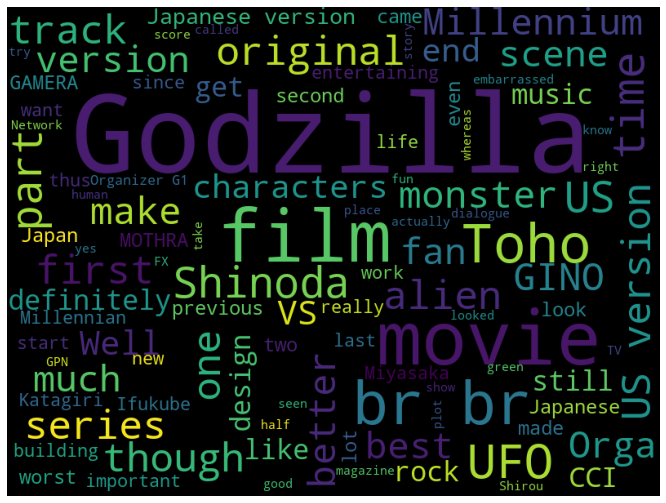

In [6]:
# import et utilisation de wordcloud
from wordcloud import WordCloud

# un texte
text = reviews.loc[reviews.str.len().idxmax()]

# texte aléatoire
#from numpy import random
#random.seed(100)
#text = df.sample(1)['review'].values[0]

# à essayer avec différentes options, e.g. stopwords=[]
wc = WordCloud(max_words=100,
               stopwords=stopwords_en,
               normalize_plurals=True,
               width=800,
               height=600)
wc.generate(text)

# affichage du nuage de mots
plt.figure(figsize=(12,9))
plt.axis("off")
plt.imshow(wc);

In [7]:
WordCloud?